# 스팀 멀티플레이어 게임 EDA

## 0. 목적

- 멀티플레이어 장르의 시장 구조·가격대·출시 시기·SNS 운영·세일·번들/DLC·리뷰/평판·활성 유저 규모를 파악해 오버워치2 UA 전략의 근거를 마련한다.

## 1. 데이터
- 최종_스팀게임정보12차.csv
- 최종_접속자수.csv

In [ ]:
import pandas as pd
df = pd.read_csv('최종_스팀게임정보12차.csv')
df1 = pd.read_csv('최종_접속자수.csv')

## 2. 정제
- 결측/이상치 처리
    - 계산 후 결측은 0으로 처리
- 중복 제거
- 파생변수 생성

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5561 non-null   int64  
 1   2308_Peak  5561 non-null   float64
 2   2308_Avg   5561 non-null   float64
 3   2309_Peak  5561 non-null   float64
 4   2309_Avg   5561 non-null   float64
 5   2310_Peak  5561 non-null   float64
 6   2310_Avg   5561 non-null   float64
 7   2311_Peak  5561 non-null   float64
 8   2311_Avg   5561 non-null   float64
 9   2312_Peak  5561 non-null   float64
 10  2312_Avg   5561 non-null   float64
 11  2401_Peak  5561 non-null   float64
 12  2401_Avg   5561 non-null   float64
 13  2402_Peak  5561 non-null   float64
 14  2402_Avg   5561 non-null   float64
 15  2403_Peak  5561 non-null   float64
 16  2403_Avg   5561 non-null   float64
 17  2404_Peak  5561 non-null   float64
 18  2404_Avg   5561 non-null   float64
 19  2405_Peak  5561 non-null   float64
 20  2405_Avg

In [46]:
import pandas as pd

# Peak, Avg 컬럼만 분리
avg_cols  = [c for c in df1.columns if '_Avg' in c]

# 월별 차이(diff) 계산
df1['Avg_change_mean']  = df1[avg_cols].diff(axis=1).iloc[:, 1:].mean(axis=1)

In [47]:
avg_vals = df1[avg_cols]

# 수동으로 퍼센트 변화율 계산
avg_pct = (avg_vals.diff(axis=1) / avg_vals.shift(axis=1))

# 0 → 값 으로 바뀐 경우: 증가율을 100%로 처리
# (즉, 이전 값이 0이고 현재 값 > 0일 때 → 1.0 = 100%)
mask = (avg_vals.shift(axis=1) == 0) & (avg_vals > 0)
avg_pct[mask] = 1.0

# NaN 무시는 그대로 유지
df1['Avg_change_pct'] = (avg_pct.mean(axis=1, skipna=True) * 100).round(1)

In [ ]:
avg_vals = df1[avg_cols]

# 수동 퍼센트 변화율 계산
avg_pct = (avg_vals.diff(axis=1) / avg_vals.shift(axis=1))

# 0 → 값으로 바뀐 경우: 100% 증가로 처리
mask = (avg_vals.shift(axis=1) == 0) & (avg_vals > 0)
avg_pct[mask] = 1.0

# 각 행에서 처음 유효한 값 기준으로 다시 pct 계산
for i, row in avg_vals.iterrows():
    valid = row.dropna()
    if len(valid) > 1:
        pct_changes = valid.pct_change()
        avg_pct.loc[i, valid.index] = pct_changes.values

In [51]:
df1[df1['id'] == 2357570]

,id,2308_Peak,2308_Avg,2309_Peak,2309_Avg,2310_Peak,2310_Avg,2311_Peak,2311_Avg,2312_Peak,...,2504_Peak,2504_Avg,2505_Peak,2505_Avg,2506_Peak,2506_Avg,2507_Peak,2507_Avg,Avg_change_mean,Avg_change_pct
4866,2357570,75361.0,28327.2,33414.0,17863.4,37788.0,19301.4,38886.0,20736.4,38536.0,...,59939.0,25815.5,40006.0,25846.3,37106.0,23254.3,30153.0,21926.1,-278.308696,-0.1


In [54]:
df1['Avg_change_pct'].describe()

count    3430.000000
mean        9.641574
std        60.310506
min      -100.000000
25%        -1.000000
50%         1.500000
75%         7.600000
max      1656.700000
Name: Avg_change_pct, dtype: float64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 0 to 5560
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5561 non-null   int64  
 1   2308_Peak        5561 non-null   float64
 2   2308_Avg         5561 non-null   float64
 3   2309_Peak        5561 non-null   float64
 4   2309_Avg         5561 non-null   float64
 5   2310_Peak        5561 non-null   float64
 6   2310_Avg         5561 non-null   float64
 7   2311_Peak        5561 non-null   float64
 8   2311_Avg         5561 non-null   float64
 9   2312_Peak        5561 non-null   float64
 10  2312_Avg         5561 non-null   float64
 11  2401_Peak        5561 non-null   float64
 12  2401_Avg         5561 non-null   float64
 13  2402_Peak        5561 non-null   float64
 14  2402_Avg         5561 non-null   float64
 15  2403_Peak        5561 non-null   float64
 16  2403_Avg         5561 non-null   float64
 17  2404_Peak     

- 별 유저 수 변화율 계산 시 이전 값이 없거나 0인 경우 변화율 산출이 불가능하므로 해당 구간은 일괄적으로 0으로 처리하여 후속 분석에 활용

In [ ]:
df = df.merge(
    df1[['id', 'Avg_change_mean', 'Avg_change_pct']],
    how='left',
    left_on='appid',
    right_on='id')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14577 entries, 0 to 14576
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                14577 non-null  int64  
 1   game_name            14577 non-null  object 
 2   genre                14577 non-null  object 
 3   price                14577 non-null  int64  
 4   release_date         14577 non-null  object 
 5   developer            14577 non-null  object 
 6   publisher            14575 non-null  object 
 7   user_reaction        14577 non-null  object 
 8   DLC여부                14577 non-null  float64
 9   all_reviews          14577 non-null  float64
 10  positive_reviews     14577 non-null  float64
 11  negative_reviews     14577 non-null  float64
 12  sns_channels         14577 non-null  object 
 13  features             14577 non-null  object 
 14  bundle               14577 non-null  float64
 15  awards               14577 non-null 

In [57]:
df.columns

Index(['appid', 'game_name', 'genre', 'price', 'release_date', 'developer',
       'publisher', 'user_reaction', 'DLC여부', 'all_reviews',
       'positive_reviews', 'negative_reviews', 'sns_channels', 'features',
       'bundle', 'awards', 'controller_support', 'interface_languages',
       'subtitle_languages', 'voice_languages', 'discount', 'discount_start',
       'discount_finish', 'peak_monthly_avg', 'avg_monthly_avg', '메타스코어',
       '유저스코어', 'main_genre', 'genre_list', 'id', 'Avg_change_mean',
       'Avg_change_pct'],
      dtype='object')

In [ ]:
# 필요없는 열 삭제
df.drop(['메타스코어', '유저스코어', 'id', 'peak_monthly_avg'], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14577 entries, 0 to 14576
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                14577 non-null  int64  
 1   game_name            14577 non-null  object 
 2   genre                14577 non-null  object 
 3   price                14577 non-null  int64  
 4   release_date         14577 non-null  object 
 5   developer            14577 non-null  object 
 6   publisher            14575 non-null  object 
 7   user_reaction        14577 non-null  object 
 8   DLC여부                14577 non-null  float64
 9   all_reviews          14577 non-null  float64
 10  positive_reviews     14577 non-null  float64
 11  negative_reviews     14577 non-null  float64
 12  sns_channels         14577 non-null  object 
 13  features             14577 non-null  object 
 14  bundle               14577 non-null  float64
 15  awards               14577 non-null 

In [ ]:
# 누락값 채우기

df[['Avg_change_mean', 'Avg_change_pct']] = df[['Avg_change_mean', 'Avg_change_pct']].fillna(0)

In [64]:
df[df['publisher'].isna()]

,appid,game_name,genre,price,release_date,developer,publisher,user_reaction,DLC여부,all_reviews,...,subtitle_languages,voice_languages,discount,discount_start,discount_finish,avg_monthly_avg,main_genre,genre_list,Avg_change_mean,Avg_change_pct
4517,2567670,A Lively Haunt,인디 | 어드벤처 | 로컬 협동 | 복고풍 | 공포,11000,2023년 09월 08일,Kevin McConnell,NaN,없음,0.0,4.0,...,x,x,70.0,2023.09.08,2025.07.11,0.0,인디,"['인디', '어드벤처', '로컬 협동', '복고풍', '공포']",0.0,0.0
12188,442710,Fantasy Tales Online,무료 플레이 | MMO | RPG | 인디 | 앞서 해보기,0,2016년 05월 06일,Cold Tea Studio,NaN,복합적,1.0,461.0,...,English,x,0.0,x,x,0.0,무료 플레이,"['무료 플레이', 'MMO', 'RPG', '인디', '앞서 해보기']",0.0,0.0


In [65]:
df.loc[4517, 'publisher'] = 'N/A'
df.loc[12188, 'publisher'] = 'N/A'

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14577 entries, 0 to 14576
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                14577 non-null  int64  
 1   game_name            14577 non-null  object 
 2   genre                14577 non-null  object 
 3   price                14577 non-null  int64  
 4   release_date         14577 non-null  object 
 5   developer            14577 non-null  object 
 6   publisher            14577 non-null  object 
 7   user_reaction        14577 non-null  object 
 8   DLC여부                14577 non-null  float64
 9   all_reviews          14577 non-null  float64
 10  positive_reviews     14577 non-null  float64
 11  negative_reviews     14577 non-null  float64
 12  sns_channels         14577 non-null  object 
 13  features             14577 non-null  object 
 14  bundle               14577 non-null  float64
 15  awards               14577 non-null 

In [ ]:
# 중복 확인
df['appid'].duplicated().sum()

np.int64(0)

In [ ]:
# 새로운 데이터 파일 저장

df.to_csv('최종_스팀게임정보11차.csv', index=False)
df[df['avg_monthly_avg'] != 0].to_csv('최종_스팀게임정보0제외.csv', index=False) # 접속자 수가 0인 데이터와 아닌 데이터로 분리

## 3. EDA 결과

### 3-1. 장르 분포

In [1]:
import pandas as pd
df = pd.read_csv('최종_스팀게임정보0제외.csv')

In [2]:
df['genre'].value_counts()

genre
인디 | 레이싱 | 스포츠 | 멀티플레이어 | PvP            5
레이싱 | 자동차 시뮬레이션 | 시뮬레이션 | 운전 | 멀티플레이어    4
공포 | 온라인 협동 | 멀티플레이어 | 심리적 공포 | 협동       4
방 탈출 | 퍼즐 | 온라인 협동 | 협동 | 멀티플레이어         3
레이싱 | 시뮬레이션 | 스포츠 | 오토바이 | 멀티플레이어        3
                                        ..
협동 | 멀티플레이어 | 액션 | 오픈 월드 | RPG           1
배틀 로얄 | 멀티플레이어 | 무술 | 성인 | PvP           1
멀티플레이어 | 캐주얼 | PvP | 협동 | 온라인 협동         1
온라인 협동 | 협동 | 분할 화면 | 풍부한 스토리 | 로컬 협동    1
생존 | 오픈 월드 | 멀티플레이어 | 협동 | 생존 공포         1
Name: count, Length: 3303, dtype: int64

In [3]:
df['genre'].describe()

count                              3351
unique                             3303
top       인디 | 레이싱 | 스포츠 | 멀티플레이어 | PvP
freq                                  5
Name: genre, dtype: object

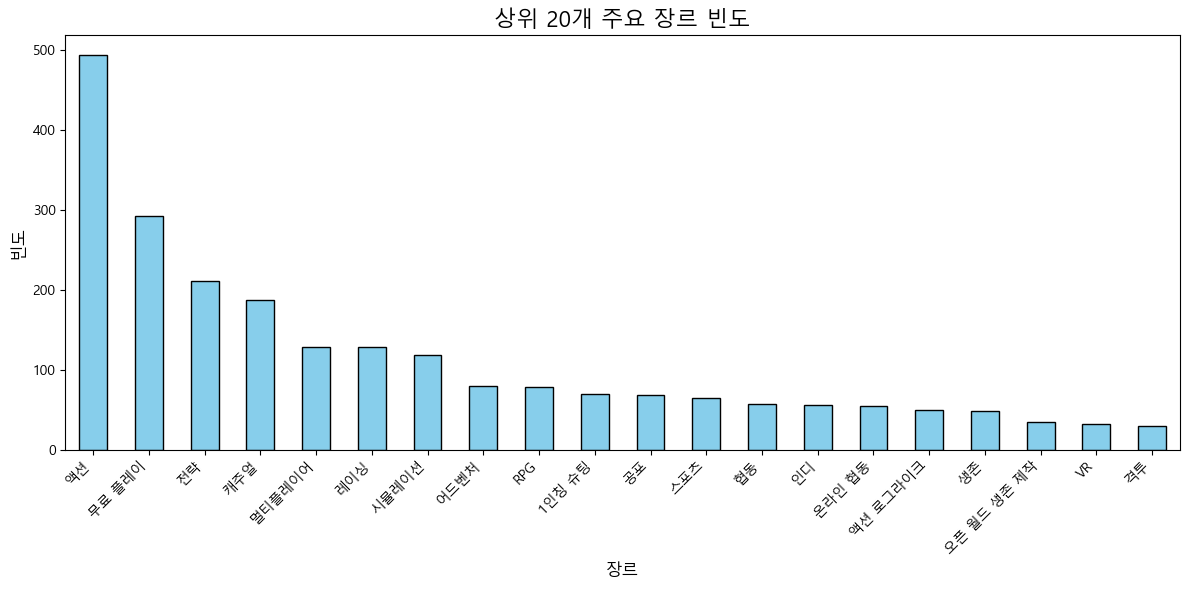

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 장르별 빈도 계산
genre_counts = df['main_genre'].value_counts()

# 상위 20개만 시각화
top_n = 20
genre_counts.head(top_n).plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')

plt.title('상위 20개 주요 장르 빈도', fontsize=16)
plt.xlabel('장르', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- 상위 빈도 장르 : 액션, 무료 플레이, 전략, 캐쥬얼 순서
    - 액션 장르의 빈도가 500개 가까이로, 그 다음 순서인 무료 플레이(300개 가까이) 와 큰 격차를 보인다.
- 상위 4개 장르 이후부터는 빈도가 급격히 줄어드는 모습이다.
    - 일부 장르가 시장 대부분을 차지하고, 나머지 장르들은 소수 니치마켓에 해당
- 레이싱, 시뮬레이션, 어드벤처 등 중위권 장르가 비슷한 빈도로 분포되어 있음
    - 상위권 장르를 제외한다면 다양하게 시도되고 있음
- 액션, 무료 플레이, 전략, 캐주얼은 사람들이 큰 호불호 없이 즐길 수 있는 장르이며 다른 게임들에 비해 접근하기 쉬운 장르
- 위 장르들은 현재 시장의 트렌드라고 볼 수 있음

### 3-1-1. 동시에 등장하는 장르 확인

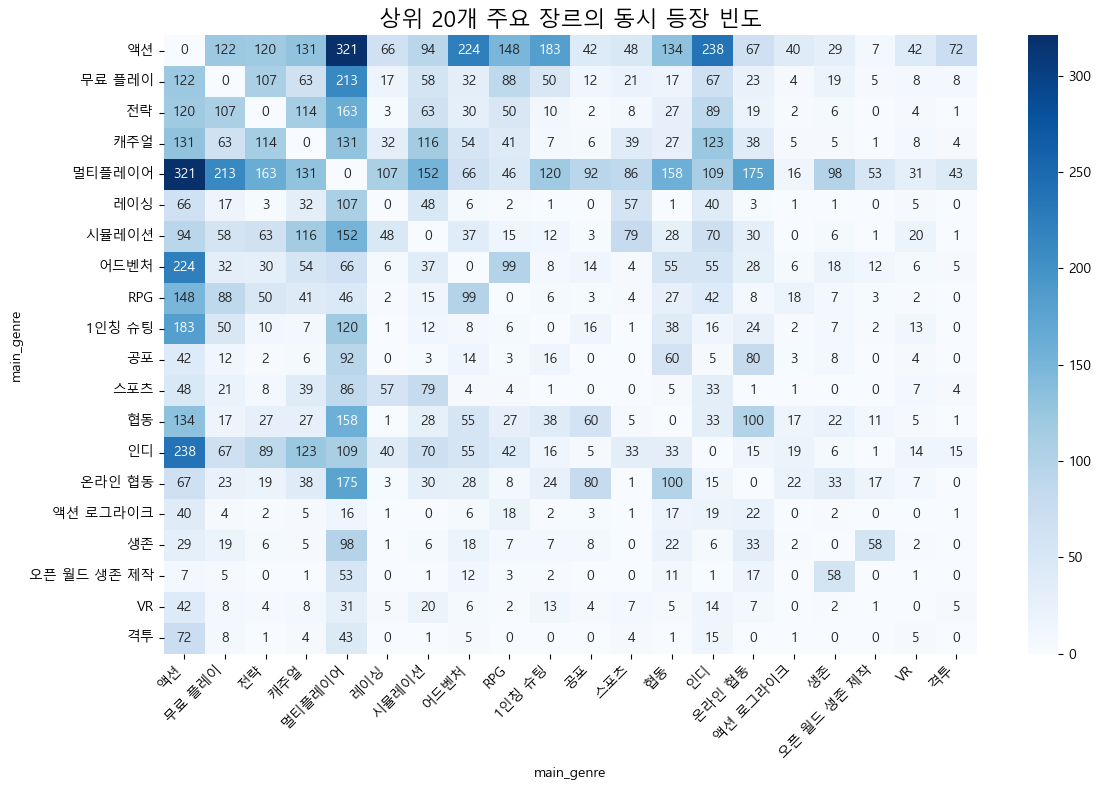

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# genre 문자열을 리스트로 변환
df['genre_list'] = df['genre'].str.split('|').apply(lambda x: [g.strip() for g in x])

# 모든 장르 목록 추출
all_genres = sorted(set(g for genres in df['genre_list'] for g in genres))

# 동시 등장 빈도 DataFrame 생성
co_occurrence = pd.DataFrame(0, index=all_genres, columns=all_genres)

# 동시 등장 카운트
for genres in df['genre_list']:
    for g1 in genres:
        for g2 in genres:
            if g1 != g2:
                co_occurrence.loc[g1, g2] += 1

# 상위 N개 장르만 필터링 (예: 빈도 기준 상위 20개)
top_genres = df['main_genre'].value_counts().head(20).index
co_occurrence_top = co_occurrence.loc[top_genres, top_genres]

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_top, annot=True, fmt='d', cmap='Blues')
plt.title('상위 20개 주요 장르의 동시 등장 빈도', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


- 액션, 멀티플레이어, 무료 플레이가 다른 장르와 가장 자주 결합하는 장르로 나타남
- 액션+멀티플레이어(321), 액션+어드벤처(224), 액션+인디(238), 멀티플레이어+무료플레이(213) 등
- 액션-멀티플레이어-무료-협동/온라인 협동 축이 중심 허브를 형성하고 외 전략-시뮬레이션-RPG는 또 다른 보조 허브를 구성한다.

### 3-2. 가격대

In [8]:
df['price'].value_counts()

price
0        1198
21500     168
11000     137
16500     110
10500      85
         ... 
3770        1
21900       1
6240        1
9300        1
10100       1
Name: count, Length: 380, dtype: int64

In [9]:
df['price'].describe()

count      3351.000000
mean      13117.153089
std       16292.230387
min           0.000000
25%           0.000000
50%        8900.000000
75%       21000.000000
max      176500.000000
Name: price, dtype: float64

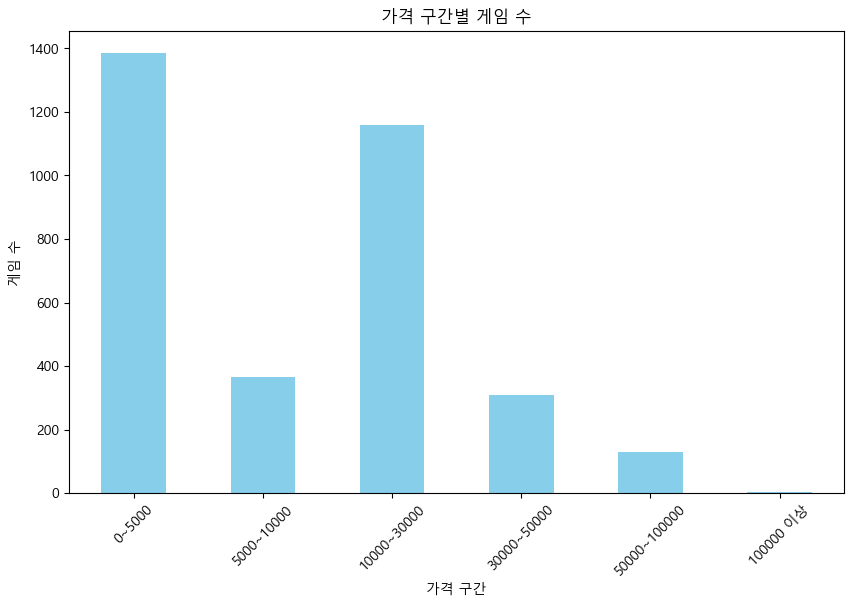

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 df
# df = pd.DataFrame({'price': [0, 2000, 7000, 15000, 40000, 80000, 120000]})

# 가격 구간 정의
bins = [0, 5000, 10000, 30000, 50000, 100000, float('inf')]
labels = ['0~5000', '5000~10000', '10000~30000', '30000~50000', '50000~100000', '100000 이상']

# 가격 구간별로 구분
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# 구간별 갯수 계산
price_counts = df['price_range'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
price_counts.plot(kind='bar', color='skyblue')
plt.title('가격 구간별 게임 수')
plt.xlabel('가격 구간')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 무료, 5천원~1만원, 1만원~3만원이 다수
- 유저군을 무료/3만원 이하/3만원 초과로 분류했을 때, 실제 수요는 무료,3만 이하에 편중되어 있다.

### 3-2-1. 무료~5천원 이하, 1만원 ~ 3만원 사이의 가격대들 세분화

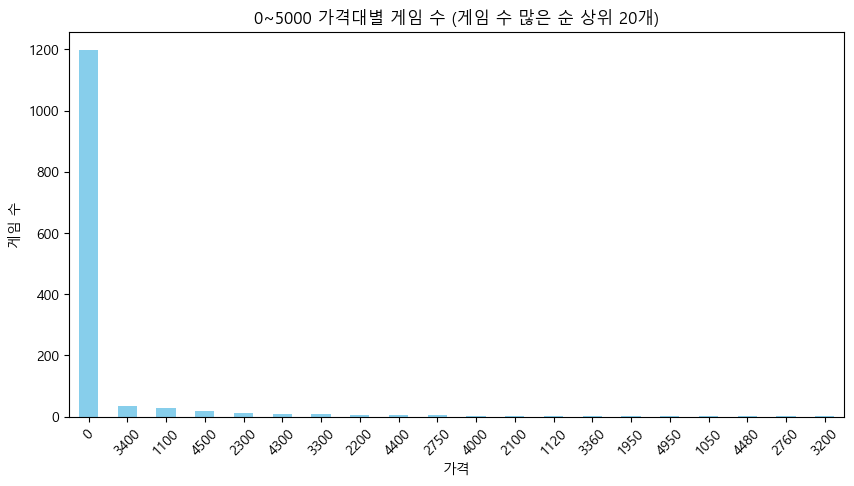

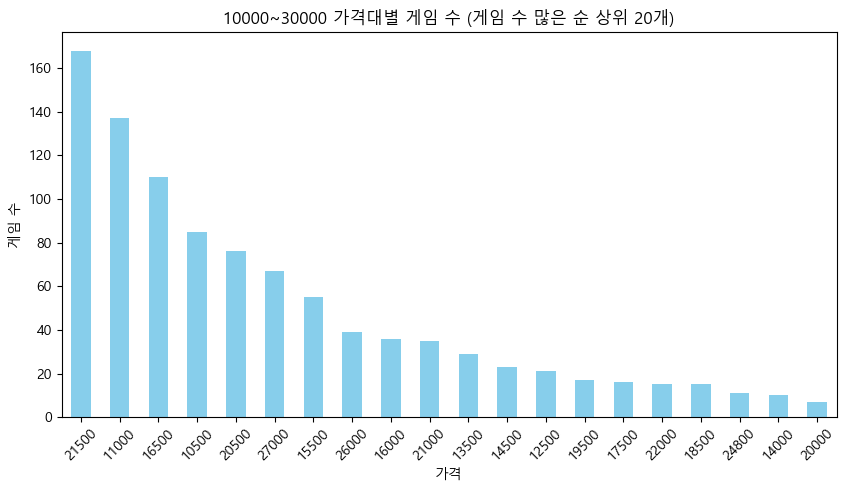

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# 가격 구간 정의
bins = [0, 5000, 10000, 30000, 50000, 100000, float('inf')]
labels = ['0~5000', '5000~10000', '10000~30000', '30000~50000', '50000~100000', '100000 이상']

# 가격 구간 지정
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# 시각화할 구간만 선택
selected_labels = ['0~5000', '10000~30000']

for label in selected_labels:
    subset = df[df['price_range'] == label]
    if subset.empty:
        continue
    # 가격별 게임 수 계산 후 많은 순으로 상위 20개 선택
    counts = subset['price'].value_counts().sort_values(ascending=False).head(20)

    plt.figure(figsize=(10,5))
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'{label} 가격대별 게임 수 (게임 수 많은 순 상위 20개)')
    plt.xlabel('가격')
    plt.ylabel('게임 수')
    plt.xticks(rotation=45)
    plt.show()

1) 0~5000원 구간
    - 0원(무료) 게임이 압도적으로 많음
    - 나머지 유료 게임들은 3400원, 1100원, 4500원 등 특정 가격대에 집중
    - 전체적으로는 무료 + 저가(1000~5000원대) 구조가 시장의 절대다수를 차지함.

2) 10000~30000원 구간
    - 가장 많은 게임 수는 21500원 부근
    - 그 다음은 11000,16500, 10500원 순
    - 10000~30000 구간은 분포가 비교적 고르게 퍼져 있음
    - 20000원대 가격은 스팀 내 표준 가격으로 자리잡았다고 볼 수 있을 듯

### 3-3. 출시 시기

In [23]:
df['release_date'].value_counts()

release_date
2025년 07월 18일    8
2020년 06월 19일    8
2025년 05월 29일    7
2024년 11월 08일    7
2024년 09월 13일    7
                ..
2010년 09월 28일    1
2010년 12월 16일    1
2011년 01월 28일    1
2011년 03월 18일    1
2011년 05월 03일    1
Name: count, Length: 2052, dtype: int64

In [ ]:
# 2025년 10월 게임 삭제
df.drop(df[df['release_date'] == '2025년 10월'].index, inplace=True)

In [25]:
df['release_date'].value_counts()

release_date
2025년 07월 18일    8
2020년 06월 19일    8
2025년 05월 29일    7
2024년 11월 08일    7
2024년 09월 13일    7
                ..
2010년 09월 28일    1
2010년 12월 16일    1
2011년 01월 28일    1
2011년 03월 18일    1
2011년 05월 03일    1
Name: count, Length: 2052, dtype: int64

In [ ]:
# 분석하기 용이하게 nnnn-nn(년, 월) 만 남기기

# 원본 df 복사
df_copy = df.copy()

# release_date에서 '년'과 '월'만 뽑아서 'YYYY-MM' 형태로 변환
df_copy['release_ym'] = df_copy['release_date'].str.extract(r'(\d{4})년\s*(\d{2})월')[0] + '-' + df_copy['release_date'].str.extract(r'(\d{4})년\s*(\d{2})월')[1]

# 확인용 value_counts 실행
counts = df_copy['release_ym'].value_counts()

counts

release_ym
2025-05    68
2024-10    61
2024-04    56
2024-11    55
2025-04    54
           ..
1999-11     1
2012-12     1
1999-04     1
2008-01     1
2007-06     1
Name: count, Length: 226, dtype: int64

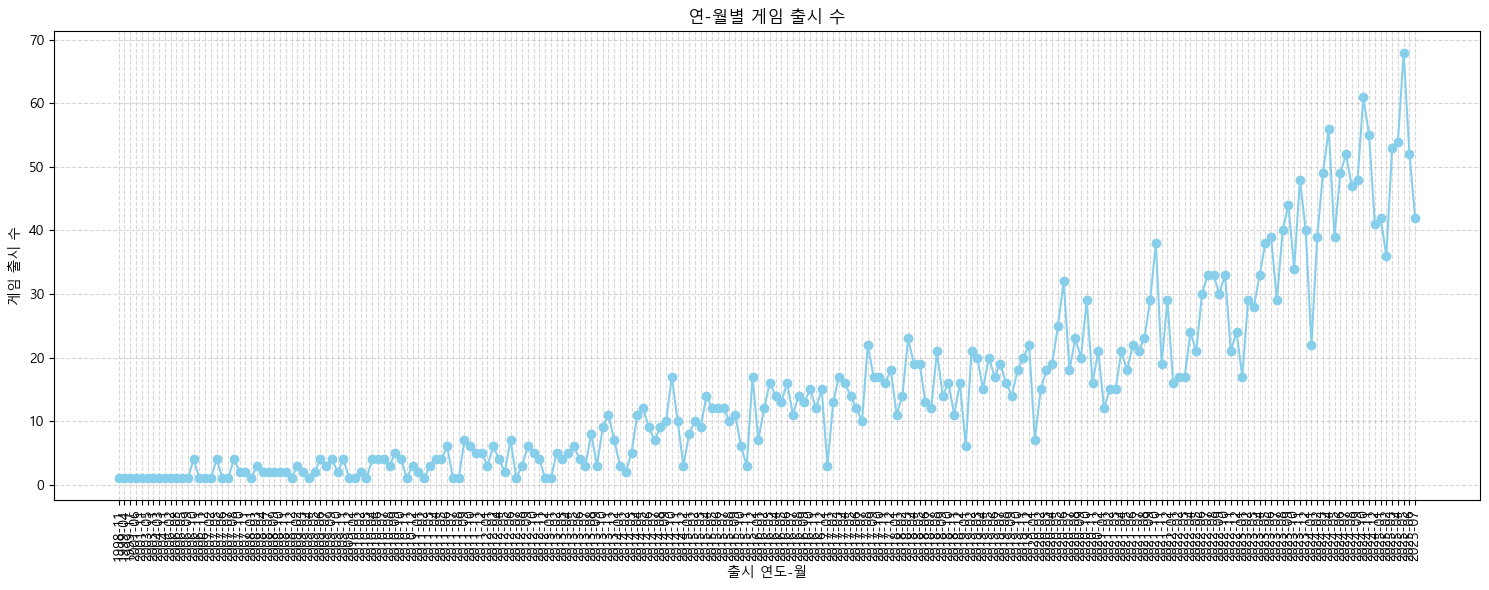

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# release_ym이 'YYYY-MM' 형태라면
release_counts = df_copy['release_ym'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(15,6))
plt.plot(release_counts.index, release_counts.values, marker='o', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('출시 연도-월')
plt.ylabel('게임 출시 수')
plt.title('연-월별 게임 출시 수')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 잘 안 보여서 3,6 개월 단위로 쪼개서 보기

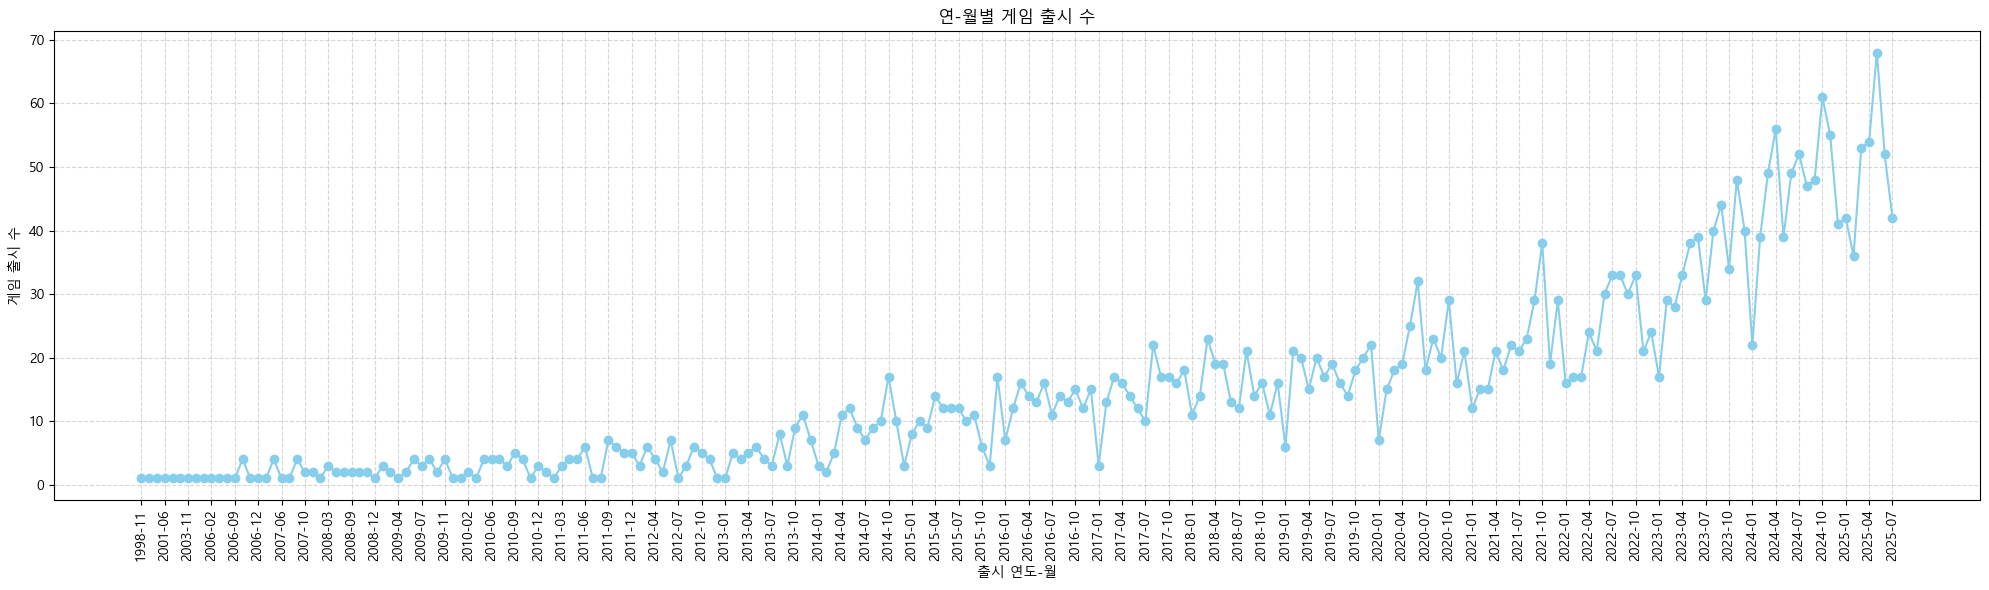

In [28]:
plt.figure(figsize=(20,6))
plt.plot(release_counts.index, release_counts.values, marker='o', color='skyblue')

# x축 라벨 중 일부만 보이도록 설정 (예: 6개월 단위)
labels = release_counts.index
plt.xticks(labels[::3], rotation=90)  # 6개월 간격으로 라벨 표시

plt.xlabel('출시 연도-월')
plt.ylabel('게임 출시 수')
plt.title('연-월별 게임 출시 수')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- 2000년대 초반까지는 출시 게임 수가 매우 적었음(월평균 1~2개 수준)
- 2010년 이후 점차 증가세로 전환
    - 스팀 플랫폼 확장과 인디 개발자 진입이 원인으로 추정됨
- 2020년대 이후 급격히 상승
- 최근 2~3년간 급격한 증가가 뚜렷함
- 전반적으로 증가세를 보이지만 특정 시점마다 큰 피크와 하락이 반복됨
- 특정 월마다 출시 수가 꾸준히 높아지는 경향이 있음.
    - 4월 전후에는 상대적으로 출시 수가 적고 7월, 10월에 출시가 몰리는 패턴이 강하다.
    - 게임사들이 여름방학과 할로윈, 연말 쇼핑 시즌에 맞춰 출시 전략을 짜기 때문이라고 추측
- 최근 출시 수 증가가 너무 가파르기 때문에 경쟁이 심화되고 인디 게임이 눈에 띄기 어려워짐

### 3-4. SNS 채널 

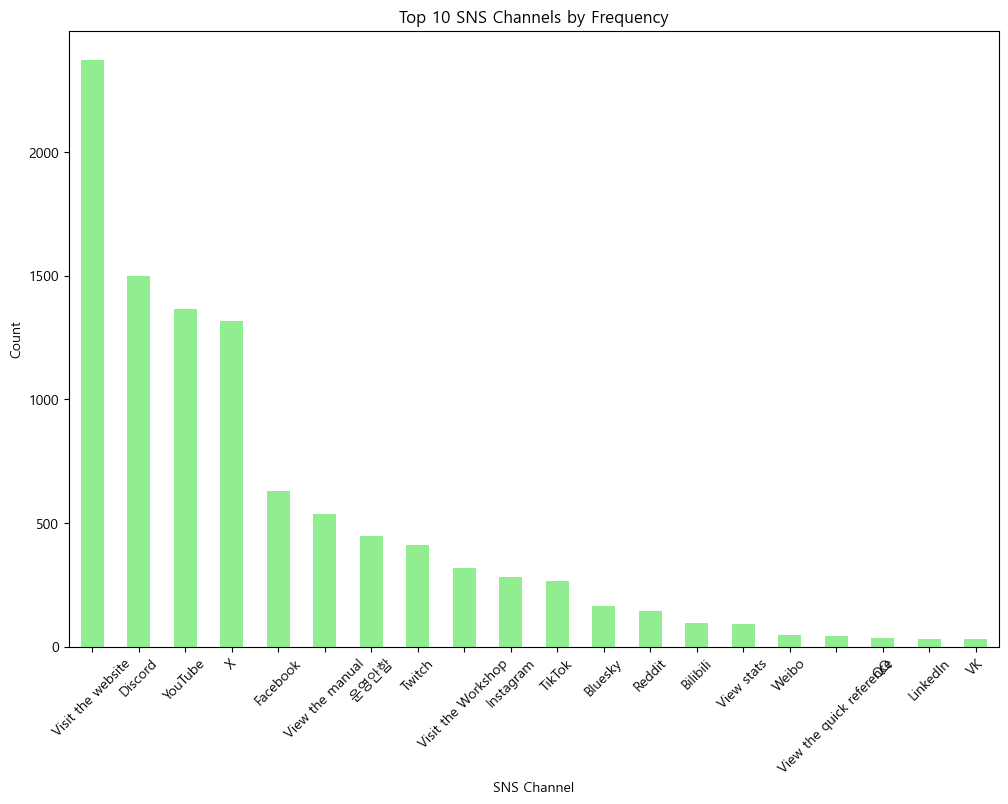

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# sns_channels 컬럼에서 각 채널을 분리해 리스트로 만들기
all_channels = df['sns_channels'].dropna().str.split(', ')

# 1차원 리스트로 모두 합치기
flat_list = [channel for sublist in all_channels for channel in sublist]

# 각 채널별 등장 횟수 세기
channel_counts = pd.Series(flat_list).value_counts()

# 상위 10개 채널만 시각화
top_channels = channel_counts.head(20)

# 시각화
plt.figure(figsize=(12,8))
top_channels.plot(kind='bar', color='lightgreen')
plt.title('Top 10 SNS Channels by Frequency')
plt.xlabel('SNS Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 대의 모든 게임이 자체 웹사이트를 운영하고 있음
    - 기본적인 정보 전달 및 공식 채널로 활용됨.
- 그 뒤로 디스코드, 유튜브, X, 페이스북, 트위치 순으로 운영을 하고 있음
- 디스코드는 게임사와 유저 간 상호 소통이 원활한 공간으로 게임사들이 소통을 위해 운영 2순위라고 판단됨
- 유튜브, X는 영상 및 텍스트로 정보를 전달하는 데 특화된 플랫폼으로 정보를 전달하기 위한 수단으로 주로 사용된다고 판단됨
- 틱톡, 레딧, 빌리빌리 등은 특정 국가나 특정 타깃층 공략 시 전략적으로 활용할 수 있을 것

>> 스팀을 주로 이용하는 유저들은 인스타그램, 레딧 보다는 디스코드, 유튜브, X를 주로 사용하는 비율이 높을 가능성이 있음

### 3-5. 최고 할인률

In [37]:
df['discount'].value_counts()

discount
0.0     1375
50.0     255
90.0     201
75.0     168
80.0     144
        ... 
18.0       1
24.0       1
97.0       1
11.0       1
12.0       1
Name: count, Length: 80, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_26840\2947926346.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_price['discount_range'] = pd.cut(zero_price['discount'], bins=bins, labels=labels, right=False)


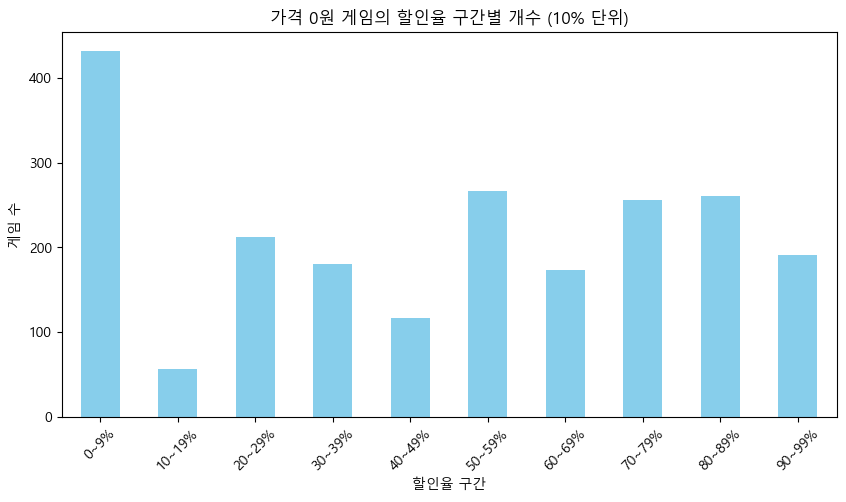

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 가격이 0인 데이터 필터링
zero_price = df[df['price'] != 0]

# 10% 단위로 구간화
bins = list(range(0, 110, 10))  # 0,10,20,...,100
labels = [f'{i}~{i+9}%' for i in bins[:-1]]

zero_price['discount_range'] = pd.cut(zero_price['discount'], bins=bins, labels=labels, right=False)

# 구간별 게임 수 계산
discount_counts = zero_price['discount_range'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,5))
discount_counts.plot(kind='bar', color='skyblue')
plt.title('가격 0원 게임의 할인율 구간별 개수 (10% 단위)')
plt.xlabel('할인율 구간')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 0~9% 구간이 가장 높은 빈도를 기록한다
    - 할인 자체를 하지 않거나, 아주 낮은 할인만 제공하는 게임이 다수 존재한다.
    - 이는 유료 게임 상당수가 가격을 유지하면서 프리미엄 전략을 택하고 있음을 의미
- 대표적인 할인 구간은 50% 할인구간이며, '반값 할인'이라는 직관적이고 심리적인 매력이 작용했을 가능성이 있다.
- 70~80% 할인도 상당히 높은 빈도를 보이며, 이는 스팀 빅세일 시즌에 자주 등장하는 할인율이다.

### 3-6. 번들의 유무

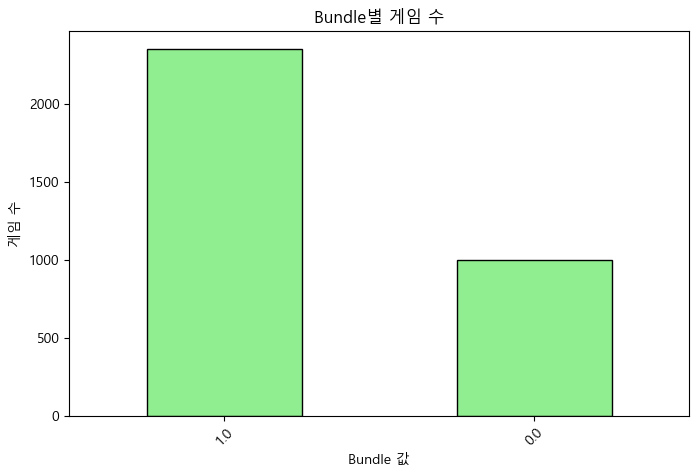

In [ ]:
import matplotlib.pyplot as plt

# bundle 값별 개수 계산
bundle_counts = df['bundle'].value_counts()

# 시각화
plt.figure(figsize=(8,5))
bundle_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Bundle별 게임 수')
plt.xlabel('Bundle 값')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 번들로 판매하는 게임이 더 많고(2배 이상) 번들로 판매하지 않는 게임이 더 적음

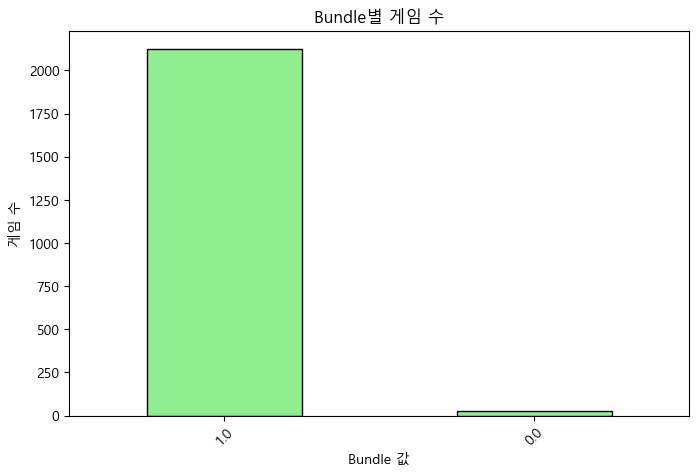

In [ ]:
# 0원인 게임을 제외하고 시각화 진행

# bundle 값별 개수 계산
bundle_counts1 = zero_price['bundle'].value_counts()

# 시각화
plt.figure(figsize=(8,5))
bundle_counts1.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Bundle별 게임 수')
plt.xlabel('Bundle 값')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 0원인 게임을 제외했을 때는 거의 모든 게임이 번들로 판매를 하고 있음
- 멀티플레이어 장르에서 번들로 판매해 고객들에게 가성비 마케팅 전략은 거의 필수적이라고 판단됨

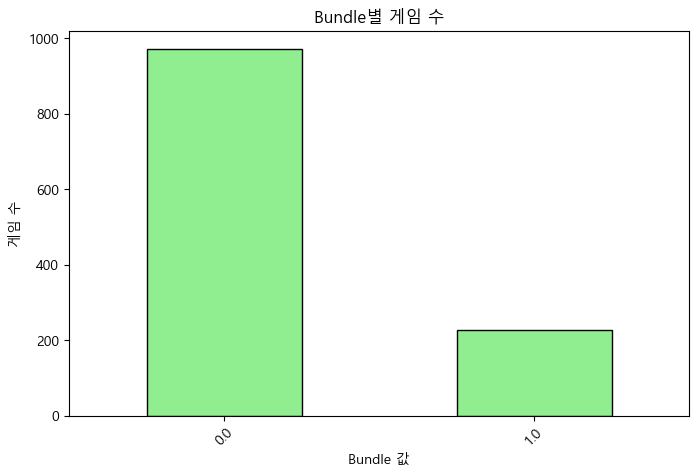

In [ ]:
# 0원 게임만 번들 시각화

# bundle 값별 개수 계산
bundle_counts2 = df[df['price'] == 0]['bundle'].value_counts()

# 시각화
plt.figure(figsize=(8,5))
bundle_counts2.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Bundle별 게임 수')
plt.xlabel('Bundle 값')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 0원인 게임들은 dlc, 다른 게임들과 엮어서 번들로 판매되는 경우가 있지만 
- 데이터 상으로 무료 게임들은 번들로 판매를 하지 않는 경향이 더 강함

>> 오버워치는 현재 번들로도 판매를 하고 있는 게임이지만 무료 게임 대부분이 번들로 판매를 하지 않고 있음

>> 이후, 다변량 EDA를 하며 무료 게임들의 번들여부에 따른 데이터 분석이 필요함

### 3-7. DLC여부

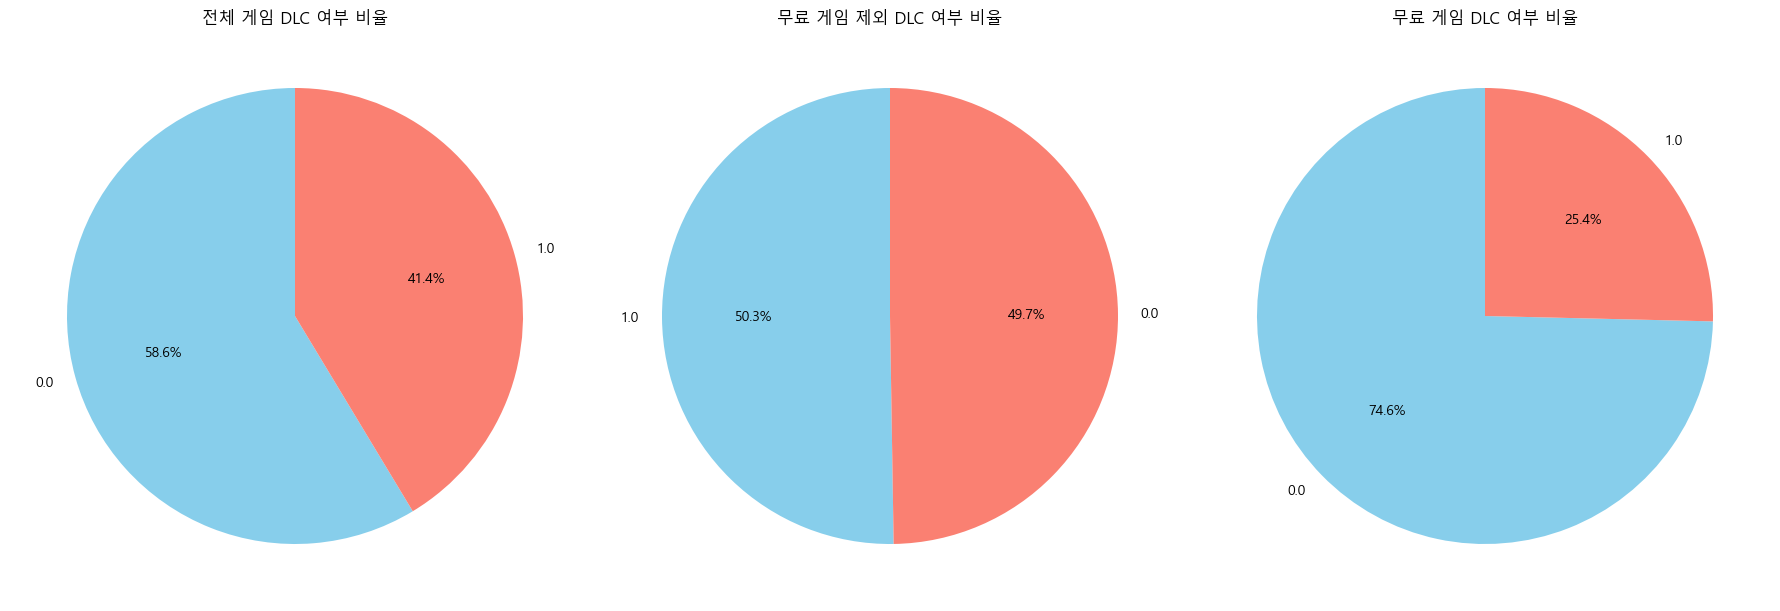

In [ ]:
import matplotlib.pyplot as plt

# DLC 여부 개수 계산
dlc_counts = df['DLC여부'].value_counts()
dlc_counts1 = zero_price['DLC여부'].value_counts()   # 무료게임 제외 (zero_price 변수에 정의되어 있다고 가정)
dlc_counts3 = df[df['price'] == 0]['DLC여부'].value_counts()  # 무료게임만

# 서브플롯 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# 전체 게임 DLC 여부
dlc_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon'],
    ax=axes[0])

axes[0].set_title('전체 게임 DLC 여부 비율')
axes[0].set_ylabel('')

# 무료 게임 제외 DLC 여부
dlc_counts1.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon'],
    ax=axes[1])

axes[1].set_title('무료 게임 제외 DLC 여부 비율')
axes[1].set_ylabel('')

# 무료 게임 DLC 여부
dlc_counts3.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue','salmon'],
    ax=axes[2])

axes[2].set_title('무료 게임 DLC 여부 비율')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

1. 전체 게임 기준
- DLC는 있음 : 41.4& , 없음 : 58.6%
    - 전체적으로 DLC를 제공하는 게임이 절반에 못 미침
    - DLC는 모든 게임에 보편적으로 포함되는 요소가 아닌 일부 게임만 선택적으로 활용하는 수익 모델임을 의미한다.

2. 유료 게임 기준
- DLC 있음 : 50.3%, 없음 : 49.7% (반반)
    - 유료 게임의 절반 이상은 DLC를 제공함.
    - 이는 메인 게임 판매 + 추가 콘텐츠 판매 형태로 수익을 극대화하는 구조가 널리 활용됨을 보여줌
    - 따라서 유료 게임에서는 DLC 판매가 이미 주류임을 보여줌

3. 무료 게임 기준
- DLC 있음: 25.4%, 없음: 74.6%
    - 무료 게임은 대부분 DLC를 제공하지 않음
    - 하지만 1/4정도는 DLC를 보유
        - 기본 게임은 무료 → 추가 수익을 DLC에서 창출하는 식

>> DLC는 유료 게임의 핵심 수익 구조인 반면에 무료 게임에서의 DLC는 선택적 전략이다.
<br>그러나 DLC를 제공하는 무료 게임은 장기적인 수익 모델 구축을 의도했다고 볼 수 있음


### 3-8. 리뷰수

In [61]:
df.columns

Index(['appid', 'game_name', 'genre', 'price', 'release_date', 'developer',
       'publisher', 'user_reaction', 'DLC여부', 'all_reviews',
       'positive_reviews', 'negative_reviews', 'sns_channels', 'features',
       'bundle', 'awards', 'controller_support', 'interface_languages',
       'subtitle_languages', 'voice_languages', 'discount', 'discount_start',
       'discount_finish', 'avg_monthly_avg', 'main_genre', 'genre_list',
       'Avg_change_mean', 'Avg_change_pct', 'price_range'],
      dtype='object')

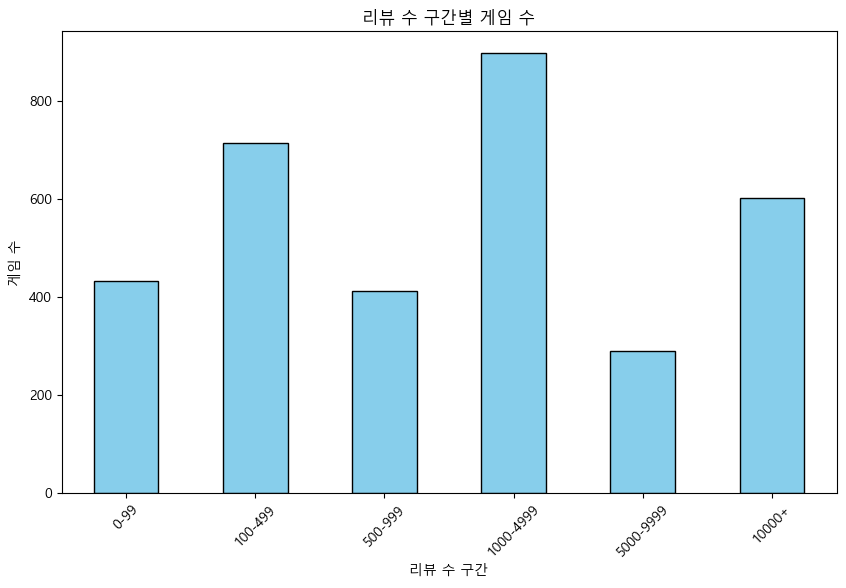

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 구간 설정
bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['0-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+']

# 구간화
df['reviews_bin'] = pd.cut(df['all_reviews'], bins=bins, labels=labels, right=False)

# 구간별 게임 수 계산
review_counts = df['reviews_bin'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
review_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('리뷰 수 구간별 게임 수')
plt.xlabel('리뷰 수 구간')
plt.ylabel('게임 수')
plt.xticks(rotation=45)
plt.show()

- 대부분의 게임이 1000 ~ 5000개 사이의 리뷰를 보유하고 있음
    - 많은 게임들이 일정 수준(수천 개)의 리뷰는 확보하고 있음.
- 리뷰 수 100~499, 10,000+ 구간도 많음
    - 100~499 리뷰: 소규모 유저층을 확보했지만 크게 확산되지 않은 게임
    - 10,000+ 리뷰: 소수지만 대형 히트작으로, 시장 내 영향력이 큼
- 리뷰 수 0~99, 500~999, 5,000~9,999 구간은 상대적으로 적음
    - 0~99: 출시되었지만 거의 주목받지 못한 게임
    - 500~999: 일정 유저층은 확보했지만 대중적으로 확산되지 못한 게임
    - 5,000~9,999: 대형 게임으로 성장하기 전 단계지만 시장에서 애매한 구간으로 보임

### 3-8-1. 게임별 긍정리뷰 비율 분포

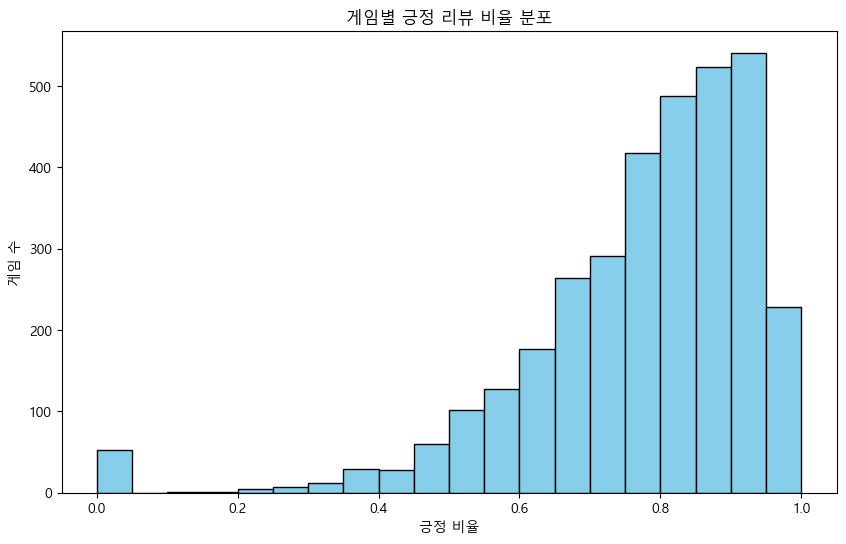

In [ ]:
import matplotlib.pyplot as plt

# 긍정 비율 계산 (0으로 나누는 오류 방지)
df['positive_ratio'] = df['positive_reviews'] / df['all_reviews']
df['positive_ratio'] = df['positive_ratio'].fillna(0)  # NaN -> 0 처리

# 히스토그램 시각화 (분포 확인)
plt.figure(figsize=(10,6))
plt.hist(df['positive_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('게임별 긍정 리뷰 비율 분포')
plt.xlabel('긍정 비율')
plt.ylabel('게임 수')
plt.show()

- 대부분 게임이 리뷰의 긍정 비율이 60% 이상
- 40% 비율 이하의 게임들은 소수 존재함
    - 0.0~0.2 구간의 소수 게임은 사실상 유저 불만이 압도적으로 높은 실패작일 가능성이 큼
- 스팀 리뷰 특성상, 만족한 유저가 더 활발히 리뷰를 남기는 경향이 반영된 결과일 수 있음
- 또한 무료 플레이·할인 게임이 많아 진입 장벽이 낮고, 상대적으로 유저 만족도가 높아졌을 가능성도 있음

>> 게임 전체적으로 긍정 리뷰가 많음
<br>이는, 유저들이 멀티플레이어 장르 게임들에 만족하고 있다는 의미
<br>대다수 게임이 60~100% 긍정 비율에 몰려 있어, '긍정 리뷰 비율'만으로는 차별화가 어렵다는 문제 발생

### 3-9. 언어

In [1]:
import pandas as pd
df = pd.read_csv('최종_스팀게임정보0제외.csv')

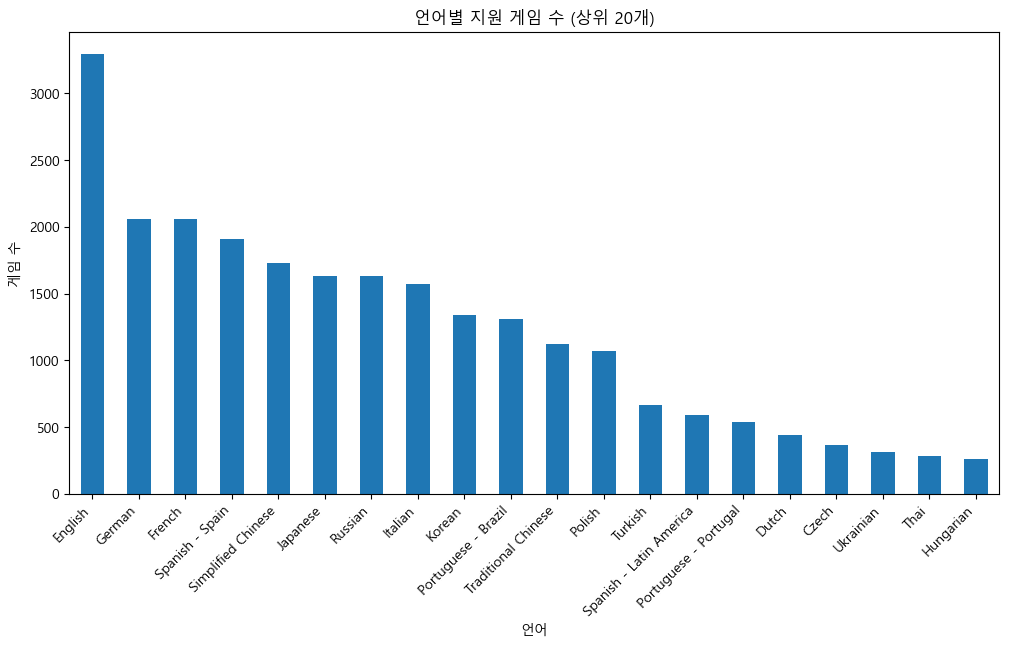

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 1. 문자열을 리스트로 변환
df['interface_languages_list'] = df['interface_languages'].str.split(',')

# 2. explode로 각 언어를 한 행씩 풀어주기
df_exploded = df.explode('interface_languages_list')

# 3. 언어 문자열 앞뒤 공백 제거
df_exploded['interface_languages_list'] = df_exploded['interface_languages_list'].str.strip()

# 4. 언어별 개수 세기
lang_counts = df_exploded['interface_languages_list'].value_counts()

# 5. 시각화 (상위 20개만 보기 예시)
plt.figure(figsize=(12,6))
lang_counts.head(20).plot(kind='bar')
plt.title("언어별 지원 게임 수 (상위 20개)")
plt.xlabel("언어")
plt.ylabel("게임 수")
plt.xticks(rotation=45, ha='right')
plt.show()


- 영어, 독일어, 프랑스어 순으로 지원을 하는 편

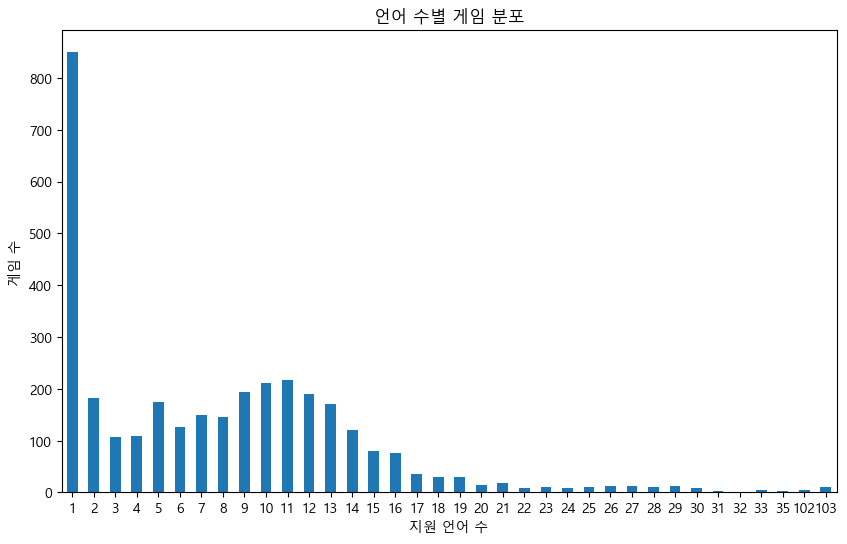

In [ ]:
# 지원 언어 수를 시각화

import pandas as pd
import matplotlib.pyplot as plt

# 1. 언어 개수 세기
df['language_count'] = df['interface_languages'].str.split(',').apply(lambda x: len(x))

# 2. 언어 수별 게임 개수 집계
lang_count_dist = df['language_count'].value_counts().sort_index()

# 3. 시각화
plt.figure(figsize=(10,6))
lang_count_dist.plot(kind='bar')
plt.title("언어 수별 게임 분포")
plt.xlabel("지원 언어 수")
plt.ylabel("게임 수")
plt.xticks(rotation=0)
plt.show()


- 1개의 언어만 사용하는 게임이 상당히 많으며 이 게임들은 영어만 지원할 가능성이 높음
- 11개 언어를 지원하는 게임까지 그 수가 증가하는 경향을 보이다가 이후 감소하는 경향을 보임
- 이는 주로 지원하는 특정 언어들이 있을 것이라 추측됨

>> 스팀 게임은 전반적으로 영어 국가, 독일, 프랑스에서 주로 사용하며 중국, 일본, 한국에서도 많은 유저들이 사용하고 있다고 판단됨

### 3-10. 평균 유저수

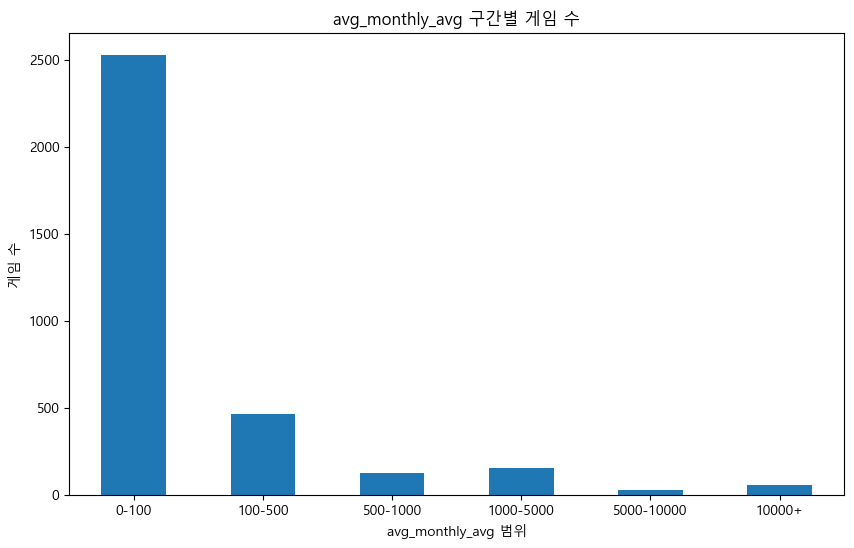

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 구간 정의
bins = [0, 100, 500, 1000, 5000, 10000, df['avg_monthly_avg'].max()]
labels = ["0-100", "100-500", "500-1000", "1000-5000", "5000-10000", "10000+"]

# 구간 라벨링
df['avg_monthly_avg_range'] = pd.cut(df['avg_monthly_avg'], bins=bins, labels=labels, include_lowest=True)

# 구간별 게임 수 계산
range_counts = df['avg_monthly_avg_range'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
range_counts.plot(kind='bar')
plt.title("avg_monthly_avg 구간별 게임 수")
plt.xlabel("avg_monthly_avg 범위")
plt.ylabel("게임 수")
plt.xticks(rotation=0)
plt.show()

- 대부분 게임이 월 평균 100명 이하 유저수를 보여줌
- 500~1000명, 1000~5000명: '꾸준히 운영되는 중소형 성공작' 범주에 들어있다고 볼 수 있음.
- 만 명 이상 유저 수를 보유한 게임이 소수 있음.
    - 소수의 메가히트작

>> 소수의 인기 게임이 시장을 독점하는 가운데, 대부분의 게임은 천 명 이하의 접속자 수에 머물고 있으며
<br>1000~10000명 구간의 게임 수가 100~500명 구간보다 적어 멀티플레이어 장르에서 천 명 이상 유저를 확보하기가 그만큼 치열한 경쟁 환경임을 보여준다.

# 결론
- 액션, 전략, 캐쥬얼 장르의 게임이 많으며, 이 중 특히 액션이 사람들이 가장 많이 찾는 장르로 판단됨
- 멀티플레이어 장르에서 유저를 무료, 3만원 이하, 3만원 이상 유료 게임을 즐기는 유저로 총 3가지로 분류가 가능함
- 이 중 무료, 3만원 이하 게임을 즐기는 유저들이 편향되어 있음

- 멀티플레이어 장르는 출시 게임 수가 증가하고 있어 꾸준히 성장중인 시장
- 봄에는 게임 출시 수가 적은 편이며 여름, 겨울이 시작될 때 게임 출시 수가 높아짐
- 이는, 여름과 겨울에 사람들이 야외활동이 줄어 게임을 많이 플레이할 가능성이 높음

- 스팀을 이용하는 유저들은 인스타그램, 레딧보다는 디스코드, 유튜브, X를 사용할 가능성이 높음
- 게임별 할인률은 다양하게 분포해 있음
- 모든 게임이 DLC를 가지고 있을 정도로 보편적이지는 않지만 유료 게임은 50% 이상이 DLC를 보유하고 있고 무료 게임도 DLC를 보유한 게임이 존재함
- 보편적이지 않음에도 불구하고 DLC를 보유하고 있다는 점은 DLC가 유저들의 관심을 끌 수 있는 중요한 요소라고 판단됨

- 전반적으로 게임들의 긍정 리뷰 비율이 높은 경향이 있음
- 이는, 유저들이 멀티플레이어 장르 게임들에 만족하고 있으며, 이탈할 가능성이 적어 시장 내 경쟁이 치열한 상황
- 또한 소수의 인기 있는 게임이 시장을 독점하고 있으며 천 ~ 만명 유저 수를 보유한 게임보다 100 ~ 500명 유저를 보유한 게임이 더 많은 상황
- 이 역시 게임들이 천 명 이상 유저수를 모으기 힘들정도로 시장 내 경쟁이 치열한 상황으로 판단됨

-> 오버워치를 마케팅 할 때는 여름, 겨울 시즌에 맞춰서 마케팅 전략을 펼칠 필요성이 있음
-> 스팀 유저 수를 증가시키기 위해서는 디스코드, 유튜브, X를 사용하는 것도 좋은 방법이라고 판단됨
-> 오버워치는 무료게임임에도 DLC를 가지고 있어 다른 무료게임이고 DLC를 가지고 있는 게임에서 벤치마킹을 하는 전략이 유효할 것이라 판단됨